In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import scipy.stats as stats

In [7]:
np.random.binomial(1, 0.5)

1

In [33]:
np.random.binomial(1000, 0.5)

531

In [48]:
n = np.random.binomial(20, .5, 10000)
(n>=15).mean()

0.0218

In [120]:
np.random.binomial(10, 1/6, 10000).mean()

1.6659

In [121]:
10/6

1.6666666666666667

In [133]:
x = np.random.normal(5, 2, size = 10000)

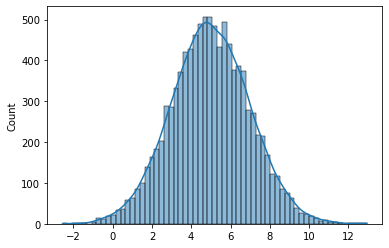

In [140]:
sns.distplot(x, kde = True, fill = True)

In [137]:
stats.skew(x)

0.0313288290263335

## Maximum Likelihood Estimation

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.optimize import minimize 

In [5]:
# generate an independent variable 
x = np.linspace(-10, 30, 100)
# generate a normally distributed residual
e = np.random.normal(10, 5, 100)
# generate ground truth
y = 10 + 4*x + e
df = pd.DataFrame({'x':x, 'y':y})
df.head()

,x,y
0,-10.000000,-16.682258
1,-9.595960,-19.150412
2,-9.191919,-21.490804
3,-8.787879,-15.230049
4,-8.383838,-15.370746


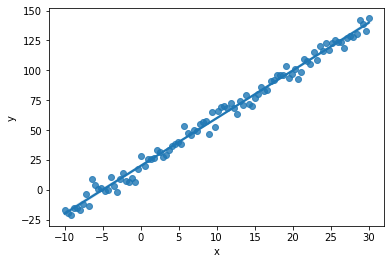

In [6]:
sns.regplot(x='x', y='y', data = df)
plt.show() 

In [12]:
features = sm.add_constant(df.x)
model = sm.OLS(y, features).fit()
# model.summary()
# model.tvalues
model.params

const    19.982938
x         3.996995
dtype: float64

In [8]:
# residual = y_true - y_pred 

res = model.resid
standard_dev = np.std(res, ddof = 0)
standard_dev

4.780225277054529

In [9]:
# MLE function
def MLE_Norm(param):
    const, beta, std_dev = param
    # predict the output
    pred = const + beta*x
    # Calculate the log-likelihood for normal distribution
    LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
    # Calculate the negative log-likelihood
    neg_LL = -1*LL
    return neg_LL 

In [10]:
# minimize arguments: function, intial_guess_of_parameters, method
mle_model = minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B', options={'disp': True})
mle_model 

      fun: 298.3426207688484
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([5.68434189e-06, 2.84217094e-05, 5.68434189e-06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 244
      nit: 37
   status: 0
  success: True
        x: array([19.98293997,  3.99699484,  4.78022614])

## Confidence Intervals

In [72]:
def abline(slope, intercept=0):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

def confidence_interval(n, confidence=0.95):
    a = np.random.normal(size=n)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m+h

In [13]:
from scipy.stats import ttest_1samp

In [17]:
data = [0.9193010,  0.2162517,  0.1790611, -0.5220764, -0.4086740,  1.5311779,  0.4575750, -0.5996455, 1.8689674, -1.1233079]
ttest_1samp(data, popmean = 0)

Ttest_1sampResult(statistic=0.8245387056792826, pvalue=0.4309431512949804)

In [53]:
confidence_interval(10)

(-0.8910105863053649, 0.6982072762723207)

In [91]:
x = np.ones((100, 2))*10
for i, val in enumerate(x):
    x[i] = confidence_interval(10)

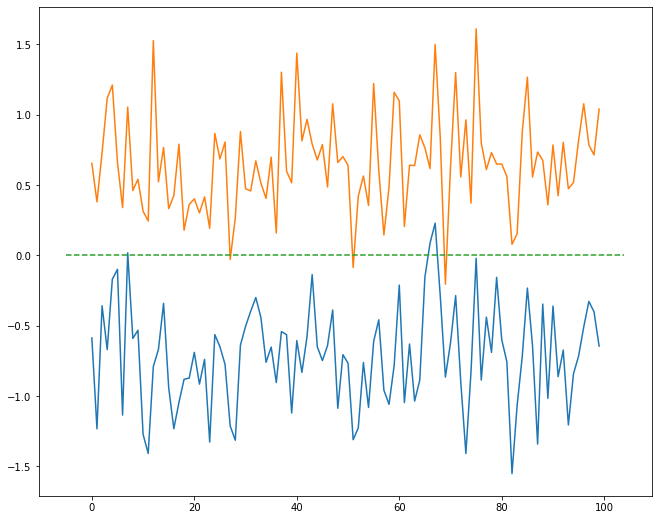

In [92]:
f, ax = plt.subplots(figsize =(11, 9))
plt.plot(x[:, 0])
plt.plot(x[:, 1])
abline(0,0)

In [93]:
num = (x[:, 0] < 0) & (x[:, 1] >0)
num.sum()/x.shape[0]

0.94

In [32]:
import researchpy as rp
# rp.ttest(data)
# https://www.pythonfordatascience.org/independent-samples-t-test-python/

TypeError: ttest() missing 1 required positional argument: 'group2'